In [ ]:
# written by Liangying, 3/31/2022

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Please enter the number of bandits: 10


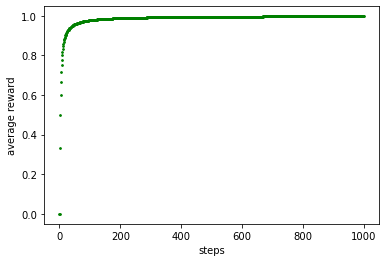

In [44]:
class Bandit():
    def __init__(self, k_arm=10, bandit_type='Gaussian'):
        self.k_arm = k_arm
        self.bandit_type = bandit_type
        self.Q = np.zeros(self.k_arm)
        if self.bandit_type == 'Gaussian':
            self.mean = np.random.normal(0,1,self.k_arm)   #因为self.mean是全局变量，所以同一个bandit不需要设seed，这样就能保证不同run之间的分布是一样的。但是不同bandit需要重新设的
            self.arm_best = np.argmax(self.mean) 
                
    def reset(self):
        self.action_count = np.zeros(self.k_arm, dtype='int')
        self.Q = np.zeros(self.k_arm)
        self.time = 0
        self.R_avg_tmp = 0
        self.action_best_tmp = 0 
        
    def pull_arm(self, time, method='Greedy'):
        self.time = time
        if method == 'Greedy':
            #initial_reward = int(input("Please enter the number of initial reward for all arms: "))
            initial_reward = 0
            if self.time == 0:
                self.Q = [initial_reward]*self.k_arm
            return np.argmax(self.Q)
            
        if method == 'Epsilon-Greedy':
            #epsilon = int(input("Please enter the number of Epsilon: "))
            epsilon = 0.1
            return np.random.choice([np.argmax(self.Q), np.random.randint(1,self.k_arm)], p=[1-epsilon, epsilon])
            
        if method == 'UCB':
            #c = int(input("Please enter the number of the parameter c: "))
            c = 2
            for i in range(self.k_arm):
                self.Q[i] = self.Q[i] + c* np.sqrt(np.log(self.time+1) / self.action_count[i])  
            return np.argmax(self.Q)
            
        if method == 'Gradient Bandit':
            pass
        
        if method == 'Thompson Sampling':
            pass
        
    def update_reward(self, action):
        self.action_count[action] += 1
        if action == self.arm_best:
            self.action_best_tmp += (1 - self.action_best_tmp) / (self.time+1)
        
        R = np.random.normal(loc = self.mean[action], scale= 1.0,size = (1))
        self.Q[action] += (R - self.Q[action]) / self.action_count[action]
        self.R_avg_tmp += (R - self.R_avg_tmp) / (self.time+1)
        
        return self.R_avg_tmp, self.action_best_tmp
        
    
if __name__ == '__main__':
    #n_bandit = int(input("Please enter the number of bandits: "))
    #n_arm = int(input("Please enter the number of arms for each bandit: "))
    #n_run = int(input("Please enter the number of runs: "))
    #n_time = int(input("Please enter the number of timesteps: "))
    #bandit_type = input("Please enter the type of bandits: ")
    
    bandit_type = 'Gaussian'
    n_arm = 10
    n_run = 1
    n_time = 1000
    n_bandit = 1
    
    R_avg = np.zeros((n_bandit,n_run, n_time))
    Best_action = np.zeros((n_bandit,n_run, n_time))   #float


    for b in range(n_bandit):
        bandit = Bandit(n_arm, bandit_type) 
        for r in range(n_run):
            bandit.reset()
            for t in range(n_time):
                Action = bandit.pull_arm(method='Epsilon-Greedy', time=t)   #这个action不需要被类里的方法调用，所以可以写在外面，但是action_count需要，所以要在类里面就定义
                Rt_avg,At_best = bandit.update_reward(Action)                           
                R_avg[b,r,t] = Rt_avg
                Best_action[b,r,t] = At_best
    
    R_avg_mean = np.mean(np.mean(R_avg,0),0)
    Best_action_mean = np.mean(np.mean(Best_action,0),0) 
    
    #print(bandit.arm_best)
    #print(Best_action)
        
    plt.scatter(np.arange(n_time),R_avg_mean,c='green',marker='o',s=3)
    #plt.scatter(np.arange(n_time),Best_action_mean,c='green',marker='o',s=3)
    plt.xlabel('steps')
    plt.ylabel('average reward')
    plt.show()        

In [4]:
import psutil
import os
info = psutil.virtual_memory()
print('内存使用：',psutil.Process(os.getpid()).memory_info().rss)
print('总内存：',info.total)
print('内存占比：',info.percent)
print('CPU个数：',psutil.cpu_count())

内存使用： 79466496
总内存： 8156008448
内存占比： 90.0
CPU个数： 8


In [ ]:
class Bandit():
    def __init__(self, k_arm=10, bandit_type='Gaussian'):
        self.k_arm = k_arm
        self.bandit_type = bandit_type
        self.Q = np.zeros(k_arm)
        if self.bandit_type == 'Gaussian':
            self.mean = np.random.normal(0,1,self.k_arm)   #因为self.mean是全局变量，所以同一个bandit不需要设seed，这样就能保证不同run之间的分布是一样的。但是不同bandit需要重新设的
        self.action_count = np.zeros(self.k_arm, dtype='int')
        
    def reset():
        self.action_count = np.zeros(self.k_arm, dtype='int')
        self.Q = np.zeros(k_arm)
        self.time = 0
        
    def pull_arm(self, time, method='Greedy'):
        self.time = time
        if method == 'Greedy':
            #initial_reward = int(input("Please enter the number of initial reward for all arms: "))
            initial_reward = 0
            if self.time == 0:
                self.Q = [initial_reward]*self.k_arm
            return np.argmax(self.Q)
            
        if method == 'Epsilon-Greedy':
            #epsilon = int(input("Please enter the number of Epsilon: "))
            epsilon = 0.1
            return np.random.choice([np.argmax(self.Q), np.random.randint(1,self.k_arm)], p=[1-epsilon, epsilon])
          
            
        if method == 'UCB':
            #c = int(input("Please enter the number of the parameter c: "))
            c = 2
            for i in range(self.k_arm):
                self.Q[i] = self.Q[i] + c* np.sqrt(np.log(self.time+1) / self.action_count[i])  #这里可能有错误
            return np.argmax(self.Q)
            
        if method == 'Gradient Bandit':
            pass
        
        if method == 'Thompson Sampling':
            pass
        
    def update_reward(self, action):
        self.action_count[action] += 1
        R = np.random.normal(loc = self.mean[action], scale= 1.0,size = (1))
        self.Q[action] += (R - self.Q[action]) / self.action_count[action]
        return R
        
    
if __name__ == '__main__':
    #n_bandit = int(input("Please enter the number of bandits: "))
    #n_arm = int(input("Please enter the number of arms for each bandit: "))
    #n_run = int(input("Please enter the number of runs: "))
    #n_time = int(input("Please enter the number of timesteps: "))
    #bandit_type = input("Please enter the type of bandits: ")
    n_arm = 10
    bandit_type = 'Gaussian'
    n_run = 2000
    n_time = 1000
    
    R_avg = np.zeros(n_time)
    R_avg_tmp = 0
    Best_action = np.zeros(n_time)
    
    bandit = Bandit(n_arm, bandit_type)

    for t in range(n_time):
        Action = bandit.pull_arm(method='Epsilon-Greedy', time=t)   #这个action不需要被类里的方法调用，所以可以写在外面，但是action_count需要，所以要在类里面就定义
        Rt = bandit.update_reward(Action)                           
        R_avg_tmp += (Rt - R_avg_tmp)/(t + 1)
        R_avg[t] = R_avg_tmp
        
        #R_avg[t+1] += (Rt - R_avg[t])/(t + 1)                    
        
        #所有与time有关的数组都在主函数中进行定义赋值，因为time本身就是循环，而类定义的是一次的动作。除了Q和action_count(这两个都把time给消掉了，只保留最新的值)
        # 一定要注意，这里是R_avg[t+1]而不是R_avg[t]，因为这里是按照时间点t去更新的；
        # 为什么Q[t]而不是Q[t+1]呢？因为Q是按照arm更新的，本身就已经含有t的信息，相当于不断地在同一个位置更新值。而R_avg是在下一个位置更新值。
        # 可以通过这个方法判断下标是否正确：当我想要更新值时，当前位置的值如果为0 或 初始值则说明要+1，如果当前位置的值是上一个历史的值则正确
        
        # 但是你会发现这样写就要判断t+1的边界，代码就冗长了。我们可以把它放到类里用一个全局的临时变量存储，然后再在循环中直接赋值。
        # 因为一个全局变量,（它可以是类里的self，也可以是普通的不会被重复初始化的变量,但是如果要运行不同的run，必须要写在类里），就意味着我不断地在这个位置进行更新，这个位置的当前值就包含了历史。
        # 由于Reward_avg与Arm无关，所以只需要一个公共的位置。不像Q需要k个公共的位置。
        
        # 我们最后的结果只需要R_avg和Best action，所以很多不需要用数组存储中间过程。
        
    #print(Action)
    print(bandit.mean)
    plt.scatter(np.arange(n_time),R_avg,c='green',marker='o',s=3)
    #plt.scatter(np.arange(n_arm),bandit.Q,c='green',marker='o',s=3)
    plt.xlabel('steps')
    plt.ylabel('average reward')
    plt.show()        

In [ ]:
# 请比较这三种不同的写法，掌握写代码的简洁性技巧。其中一个重要原则就是，不需要保存的中间结果全部用一个临时变量存储，放到for循环里不断地更新，而不是用数组存下来，很容易出现内存不足的情况

In [ ]:
class Bandit():
    def __init__(self, k_arm=10, bandit_type='Gaussian',n_timesteps=1000):
        self.k_arm = k_arm
        self.bandit_type = bandit_type
        self.Q = np.zeros(k_arm)
        if self.bandit_type == 'Gaussian':
            self.mean = np.random.normal(0,1,self.k_arm)
        self.action = np.zeros(n_timesteps, dtype='int')
        self.action_count = np.zeros(self.k_arm, dtype='int')
        self.avg_reward = np.zeros(n_timesteps)
        
    def pull_arm(self, time, method='Greedy'):
        self.time = time
        if method == 'Greedy':
            #initial_reward = int(input("Please enter the number of initial reward for all arms: "))
            initial_reward = 0
            if self.time == 0:
                self.Q = [initial_reward]*self.k_arm
            self.action[self.time] = np.argmax(self.Q)
            
        if method == 'Epsilon-Greedy':
            #epsilon = int(input("Please enter the number of Epsilon: "))
            epsilon = 0.1
            self.action[self.time] = np.random.choice([np.argmax(self.Q), np.random.randint(1,self.k_arm)], p=[1-epsilon, epsilon])
          
            
        if method == 'UCB':
            #c = int(input("Please enter the number of the parameter c: "))
            c = 2
            Q_UCB = np.zeros(self.k_arm)
            for i in range(self.k_arm):
                count = np.sum(self.action[0:self.time+1] == i)
                Q_UCB[i] = self.Q[i] + c* np.sqrt(np.log(self.time+1) / count)
            self.action[self.time] = np.argmax(Q_UCB)
            
        if method == 'Gradient Bandit':
            pass
        
        if method == 'Thompson Sampling':
            pass
        
    def update_reward(self):
        arm = self.action[self.time]
        R = np.random.normal(loc = self.mean[arm] , scale= 1.0,size = (1))
        count = np.sum(self.action[0:self.time+1] == arm)
        self.Q[arm] += 1/count * (R - self.Q[arm])
        try:
            self.avg_reward[self.time+1] = self.avg_reward[self.time] + (R-self.avg_reward[self.time]) / (self.time+1)
        except:
            self.time -=1                   
    
if __name__ == '__main__':
    #n_bandit = int(input("Please enter the number of bandits: "))
    #n_arm = int(input("Please enter the number of arms for each bandit: "))
    #n_run = int(input("Please enter the number of runs: "))
    #n_time = int(input("Please enter the number of timesteps: "))
    #bandit_type = input("Please enter the type of bandits: ")
    n_arm = 10
    bandit_type = 'Gaussian'
    n_time = 1000
    
    bandit = Bandit(n_arm, bandit_type, n_time)
    for t in range(n_time):
        bandit.pull_arm(method='Greedy', time=t)
        bandit.update_reward()

    plt.scatter(np.arange(n_time),bandit.avg_reward,c='green',marker='o',s=3)
    #plt.scatter(np.arange(10),bandit.Q,c='green',marker='o',s=3)
    plt.xlabel('steps')
    plt.ylabel('average reward')
    plt.show()        
 